<a href="https://colab.research.google.com/github/Laveluca/Bai-tap-AI/blob/main/Nhandienkhuonmat_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
import os
train_image_files_path ='/content/drive/MyDrive/Trung III/Colab ( file ảnh )/Khuôn mặt/Train'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)


In [5]:
label = ['Bảo','Triễn','Trung']

In [6]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')

Found 160 images belonging to 3 classes.


In [7]:
x_train,y_train=next(train_generator)


In [8]:
x_train.shape


(32, 200, 200, 3)

In [9]:
y_train.shape


(32, 3)

In [10]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [14]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               61440512  
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 61,442,051
Trainable params: 61,442,051
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.fit(x_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0990 - accuracy: 0.1875
Epoch 2/100
1/1 [==============================] - 1s 560ms/step - loss: 1.1764 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 1s 584ms/step - loss: 3.0739 - accuracy: 0.3125
Epoch 4/100
1/1 [==============================] - 1s 634ms/step - loss: 1.2567 - accuracy: 0.6875
Epoch 5/100
1/1 [==============================] - 1s 564ms/step - loss: 0.4717 - accuracy: 0.8125
Epoch 6/100
1/1 [==============================] - 1s 575ms/step - loss: 0.4220 - accuracy: 0.8125
Epoch 7/100
1/1 [==============================] - 1s 572ms/step - loss: 0.3810 - accuracy: 0.9375
Epoch 8/100
1/1 [==============================] - 1s 580ms/step - loss: 0.3472 - accuracy: 0.9375
Epoch 9/100
1/1 [==============================] - 1s 559ms/step - loss: 0.3192 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 1s 561ms/step - loss: 0.2944 - accuracy: 1.0000
Epoch 11/100

1/1 [==============================] - 0s 107ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 50ms/step
Đây là: Bảo


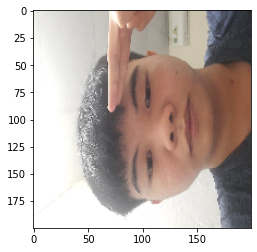

In [17]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Trung III/Colab ( file ảnh )/Khuôn mặt/Test/Bảo/20221121_103522.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])


1/1 [==============================] - 0s 45ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 49ms/step
Đây là: Trung


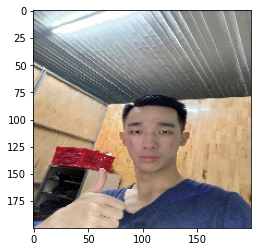

In [20]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Trung III/Colab ( file ảnh )/Khuôn mặt/Test/Trung/1b59b982ffc826967fd936.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])


1/1 [==============================] - 0s 91ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 146ms/step
Đây là: Triễn


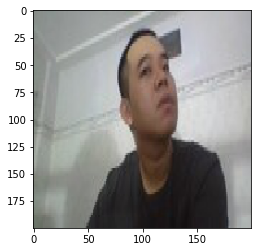

In [18]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Trung III/Colab ( file ảnh )/Khuôn mặt/Test/Triễn/Trien24.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])
